In [1]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import seaborn as sns
import math

In [2]:
phase_angle = -82.08
phase_lag = 11.88
phase_vector = math.cos(math.radians(phase_angle)), math.sin(math.radians(phase_angle))
lag_vector = math.cos(math.radians(phase_lag)), math.sin(math.radians(phase_lag))
origin = (0,0)
origin,phase_vector,lag_vector

((0, 0),
 (0.1377902906846382, -0.9904614256966512),
 (0.9785809043254721, 0.20586260876988133))

The objective here is to create a function that will plot an array of vectors given (x,y) coordinates.

Baby steps though, first plot a vector.

In [3]:
v1 = (1,2) #x,y
v2 = (3,1) #x,y
v3 = (2,1) #x,y

vlist = [v1,v2,v3]
 
# The trick is going to be taking these as input and outputting something like (0,0,x,y)
def vector_to_quiver():
    ...

Text(0.5, 1.0, 'Phase Diagram')

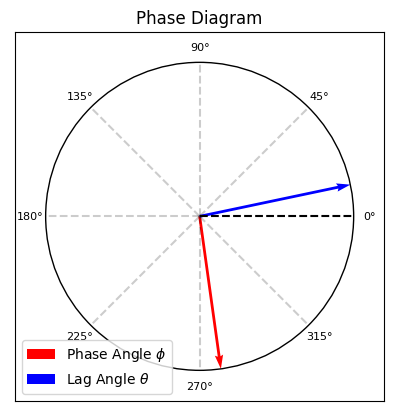

In [4]:
## Something I knocked out for an assignment, but now I want to make repeatable
fig = plt.figure()
ax = fig.gca()
x,y = origin
ax.quiver(x,y,phase_vector[0],phase_vector[1],
            label='Phase Angle $\phi$',
            color='r',
            units='xy',
            scale=1,
            scale_units='xy',
            angles='xy'
            )

ax.quiver(x,y,lag_vector[0],lag_vector[1],
            label='Lag Angle $\\theta$',
            color='b',
            units='xy',
            scale=1,
            scale_units='xy',
            angles='xy'
            )

ax.legend(loc='lower left')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_aspect('equal')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
# ax.grid(True,'both')

circle = patches.Circle(origin, radius=1, facecolor='none', edgecolor='black')
ax.add_patch(circle)
for angle in range(0, 360, 45):
    x_point = math.cos(math.radians(angle))
    y_point = math.sin(math.radians(angle))
    mag = 1.1
    x_marker = math.cos(math.radians(angle))*mag
    y_marker = math.sin(math.radians(angle))*mag
    ax.plot([x, x_point], [y, y_point], color='black', linestyle='--', alpha=0.2)
    ax.text(x_marker, y_marker, f'{angle}°', ha='center', va='center', color='black', fontsize=8)
ax.plot([0,1],[0,0],color='black',linestyle='--')


ax.set_title('Phase Diagram')

In [5]:
np.array(vlist).T

array([[1, 3, 2],
       [2, 1, 1]])

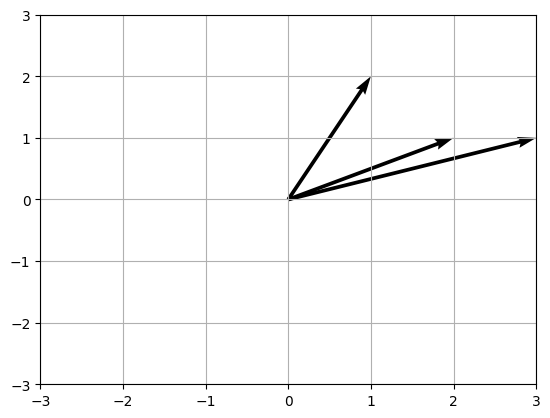

In [6]:
fig, ax = plt.subplots()
ax.quiver(
    np.zeros(len(vlist)),
    np.zeros(len(vlist)),
    np.array(vlist).T[0],
    np.array(vlist).T[1],
    angles='xy',
    scale_units='xy',
    scale=1
)
ax = fig.gca()
lim = max(max(np.array(vlist).T[0]),max(np.array(vlist).T[1]))
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.grid(True,)

Not bad. I'd like to make each arrow its own color, and I'll need to be mindful that each vector might have a name attached to it.

8


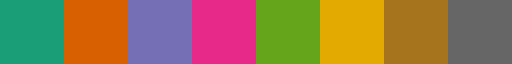

In [7]:
# We can use matplotlib's color-maps to control the color of each arrow.
# I prefer the Dark2 set over the default because the default has a very bright yellow that can be hard to see on a white background.
from matplotlib import cm
print(cm.Dark2.N)
cm.Dark2

In [8]:
# If needed we can pull a color directly
[cm.Dark2(i%cm.Dark2.N) for i in range(9) ]

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667, 1.0),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196, 1.0),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254, 1.0),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353, 1.0),
 (0.4, 0.6509803921568628, 0.11764705882352941, 1.0),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196, 1.0),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843, 1.0),
 (0.4, 0.4, 0.4, 1.0),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667, 1.0)]

In [9]:
cm.Dark2.N

8

In [10]:
np.array(vlist).max()

3

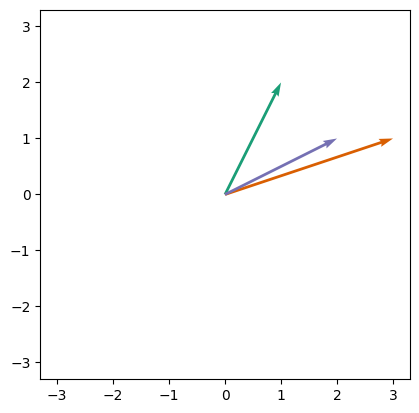

In [11]:
fig, ax = plt.subplots()
max = np.array(vlist).max()
lim=max*1.1
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')
for i, vector in enumerate(vlist):
    ax.quiver(
        0,
        0,
        vector[0],
        vector[1],
        color= cm.Dark2(i%cm.Dark2.N),
        scale = 1,
        scale_units='xy',
        angles='xy'
    )

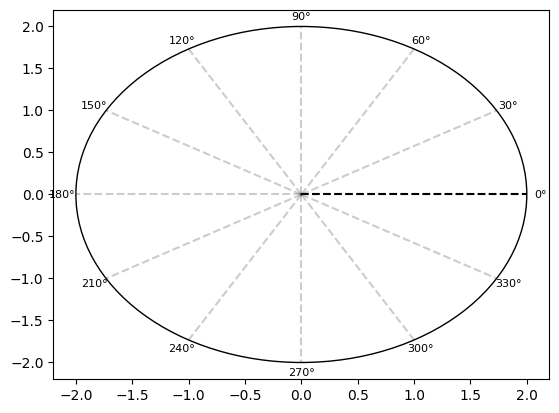

In [33]:
def ax_add_circle(radius, deg_step=30, ax=plt.gca()):
    import matplotlib.patches as patches
    circle = patches.Circle(origin, radius=radius, facecolor='none', edgecolor='black')
    ax.add_patch(circle)
    for angle in range(0, 360, deg_step):
        x_point = radius*math.cos(math.radians(angle))
        y_point = radius*math.sin(math.radians(angle))
        mag = 1.06
        x_marker = radius*math.cos(math.radians(angle))*mag
        y_marker = radius*math.sin(math.radians(angle))*mag
        ax.plot([0, x_point], [0, y_point], color='black', linestyle='--', alpha=0.2)
        ax.text(x_marker, y_marker, f'{angle}°', ha='center', va='center', color='black', fontsize=8)
    ax.plot([0,radius],[0,0],color='black',linestyle='--')
ax.set_aspect('equal')
ax_add_circle(2)

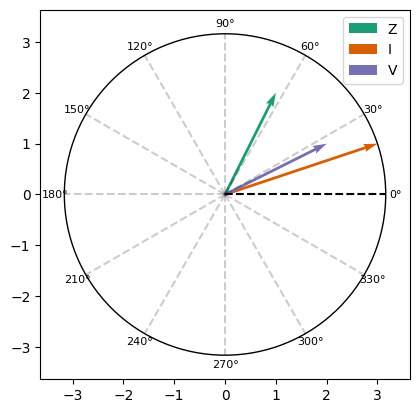

In [46]:
def plot_vector_diagram(vectors:list, unitcircle=True, cmap='Dark2'):
    # Import within the function to save future me some heartache
    from matplotlib import colormaps
    _cmap = colormaps.get(cmap)

    fig, ax = plt.subplots()
    
    # Make everything fit on screen and set a 1:1 aspect ratio
    magnitudes = [math.hypot(vector[0],vector[1]) for vector in vectors]
    max = np.max(magnitudes)
    lim=max*1.15
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_aspect('equal')

    #Draw each arrow one at a time with a pretty color
    for i, vector in enumerate(vectors):
        ax.quiver(
            0,
            0,
            vector[0],
            vector[1],
            color= _cmap(i%_cmap.N),
            scale = 1,
            scale_units='xy',
            angles='xy'
        )
    
    if unitcircle:
        ax_add_circle(max,ax=ax)

    return fig, ax



fig, ax = plot_vector_diagram(vlist)
ax.legend(labels=['Z','I','V'], loc='best')

## Todo
- Programatically annotate each vector with their magnitudes
- Find a solution to normalize vector sizes when working with very different units, (Eg. mA and kΩ)